# Additional methods

This notebooks provides an overview of built-in clustering performance evaluation, ways of accessing individual labels resulting from clustering and saving the object to disk.

## Clustering performance evaluation

Clustergam includes handy wrappers around a selection of clustering performance metrics offered by
`scikit-learn`. Data which were originally computed on GPU are converted to numpy on the fly.

Let's load the data and fit clustergram on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [1]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

seaborn.set(style='whitegrid')

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

cgram = Clustergram(range(1, 12), n_init=10, verbose=False)
cgram.fit(data)

Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10})

### Silhouette score

Compute the mean Silhouette Coefficient of all samples. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) for details. 

In [2]:
cgram.silhouette_score()

2     0.531540
3     0.447219
4     0.400208
5     0.378238
6     0.370553
7     0.335069
8     0.294483
9     0.287743
10    0.285240
11    0.265328
Name: silhouette_score, dtype: float64

Once computed, resulting Series is available as `cgram.silhouette_`. Calling the original method will recompute the score.

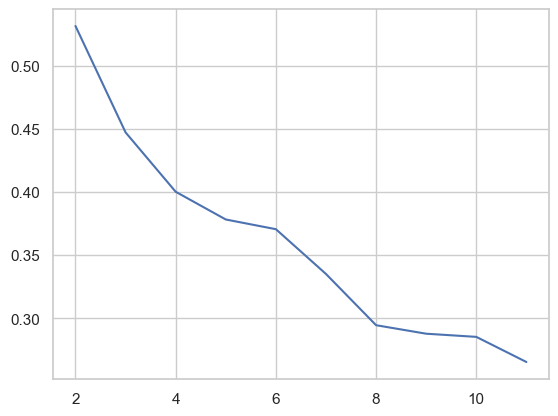

In [3]:
cgram.silhouette_.plot();

### Calinski and Harabasz score

Compute the Calinski and Harabasz score, also known as the Variance Ratio Criterion. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score) for details.

In [4]:
cgram.calinski_harabasz_score()

2     482.191469
3     441.677075
4     400.202448
5     411.258719
6     382.291616
7     352.713169
8     333.333249
9     316.626505
10    300.918215
11    282.325894
Name: calinski_harabasz_score, dtype: float64

Once computed, resulting Series is available as `cgram.calinski_harabasz_`. Calling the original method will recompute the score.

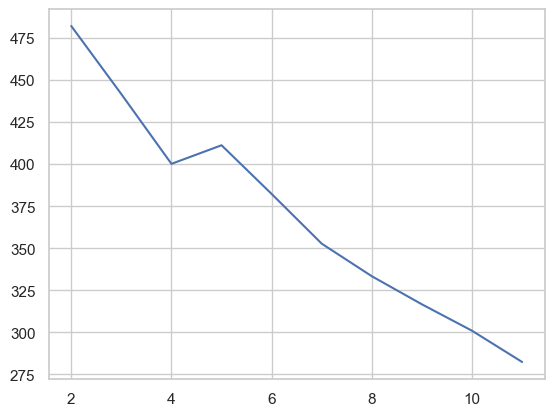

In [5]:
cgram.calinski_harabasz_.plot();

### Davies-Bouldin score

Compute the Davies-Bouldin score. See [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score) for details.

In [6]:
cgram.davies_bouldin_score()

2     0.714064
3     0.943553
4     0.943694
5     0.972408
6     0.948556
7     1.036676
8     1.148342
9     1.187468
10    1.209758
11    1.247276
Name: davies_bouldin_score, dtype: float64

Once computed, resulting Series is available as `cgram.davies_bouldin_`. Calling the original method will recompute the score.

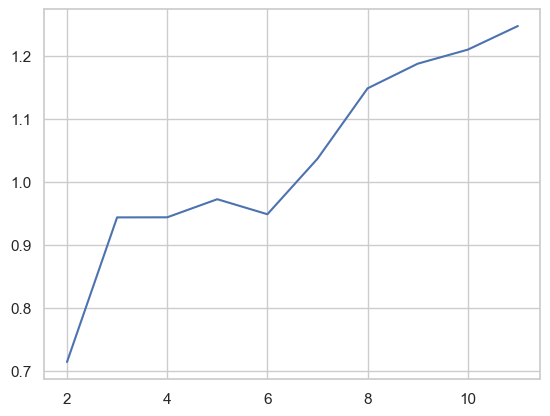

In [7]:
cgram.davies_bouldin_.plot();

## Acessing labels

`Clustergram` stores resulting labels for each of the tested options, which can be accessed as:

In [8]:
cgram.labels_

,1,2,3,4,5,6,7,8,9,10,11
0,0,0,2,0,0,4,3,7,0,0,6
1,0,0,2,0,0,4,3,2,0,6,9
2,0,0,2,0,0,4,3,2,6,6,9
3,0,0,2,0,0,4,3,7,7,0,6
4,0,0,2,0,3,5,4,7,7,8,10
...,...,...,...,...,...,...,...,...,...,...,...
337,0,1,1,1,4,3,0,4,4,5,5
338,0,1,1,1,4,3,0,4,4,5,5
339,0,1,1,3,1,1,5,5,1,4,2
340,0,1,1,1,4,3,2,1,8,1,4


## Saving clustergram

If you want to save your computed `clustergram.Clustergram` object to a disk, you can use `pickle` library:

In [9]:
import pickle

with open('clustergram.pickle','wb') as f:
    pickle.dump(cgram, f)

In [10]:
with open('clustergram.pickle','rb') as f:
    loaded = pickle.load(f)